In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

In [227]:
#Reading the dataset

df = pd.read_csv("day.csv")

In [228]:
#checking the data

df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [229]:
#checking the shape of the dataset 

df.shape

(730, 16)

In [230]:
#checking the description of the dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [231]:
#checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [232]:
#checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

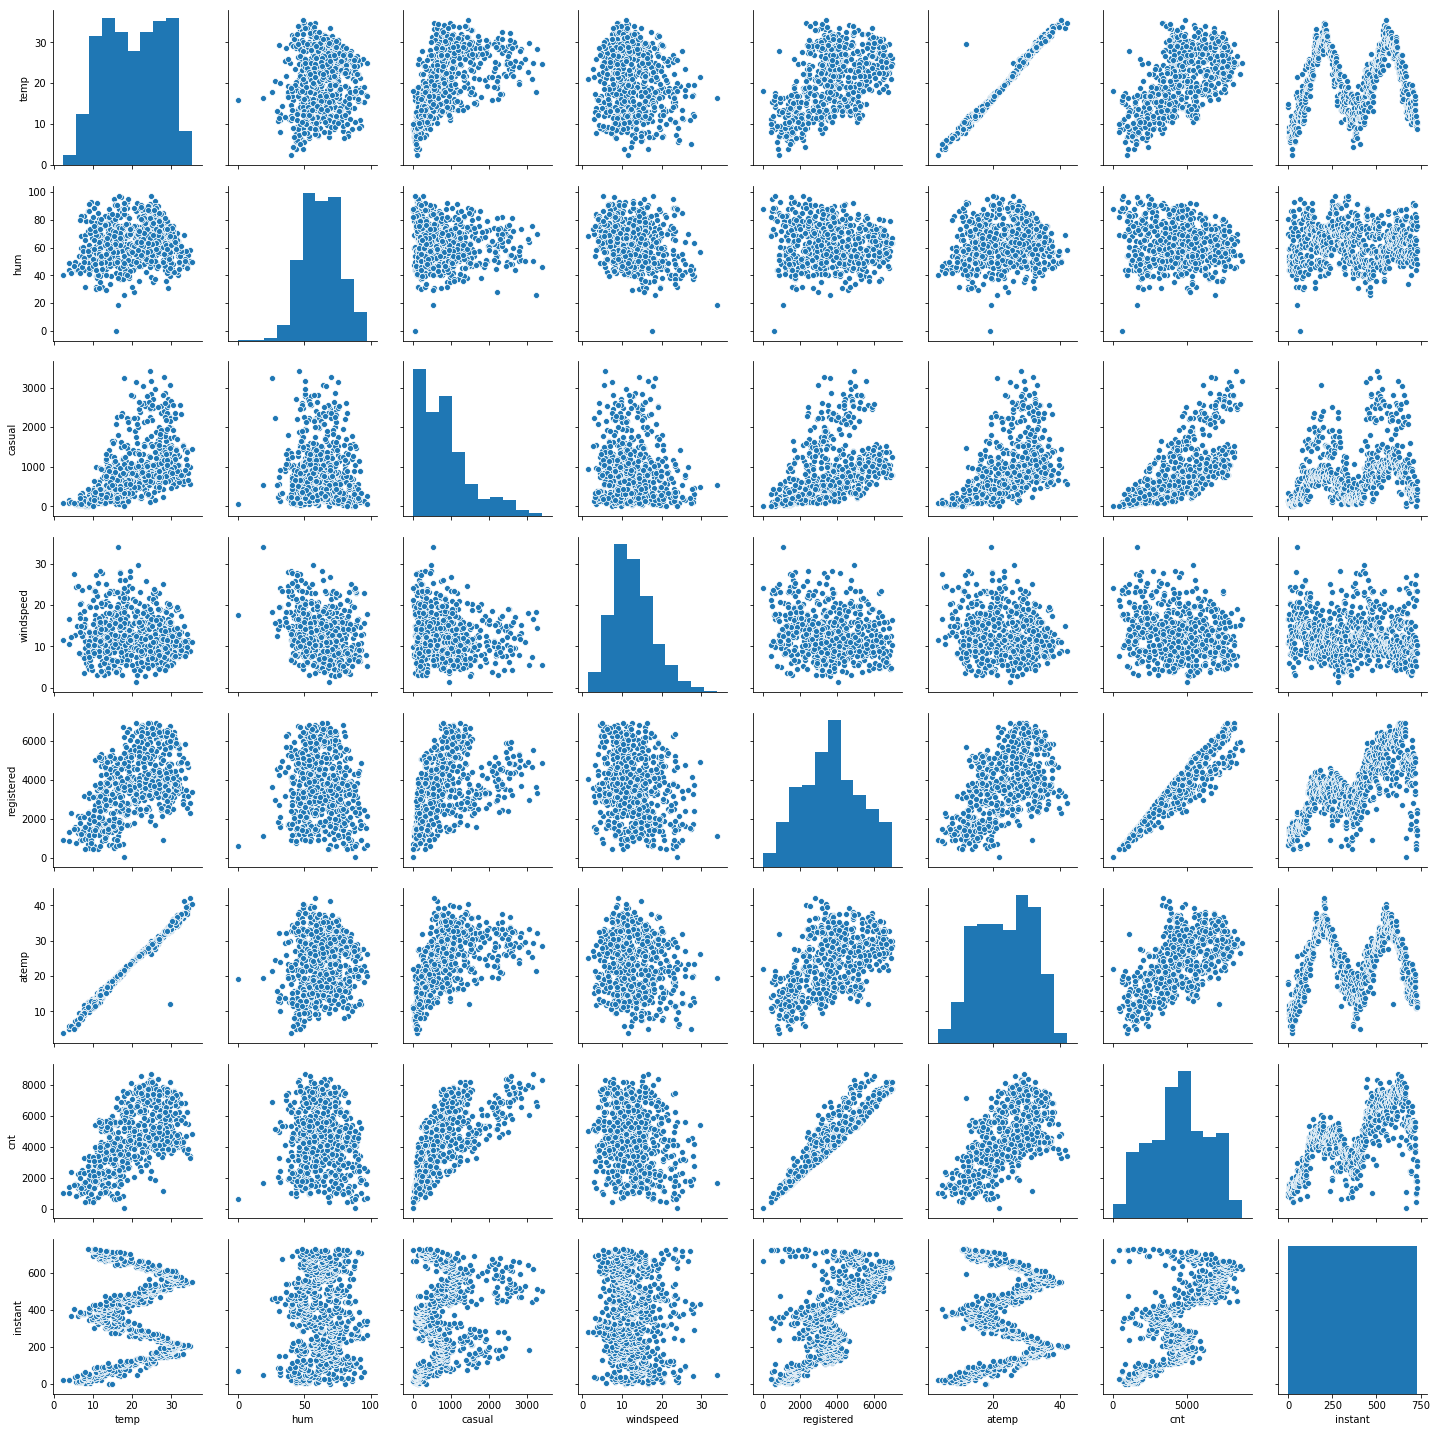

In [233]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [234]:
#mapping categorical variables with their subcategories to help with visualization analysis 
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


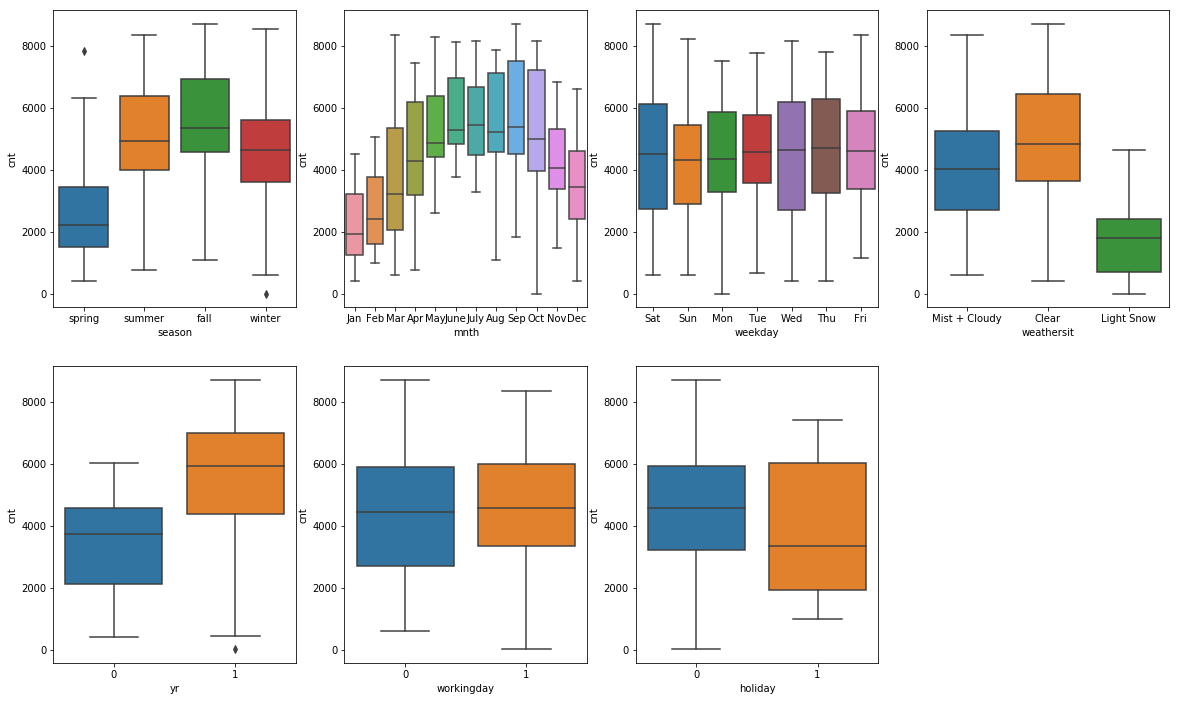

In [235]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

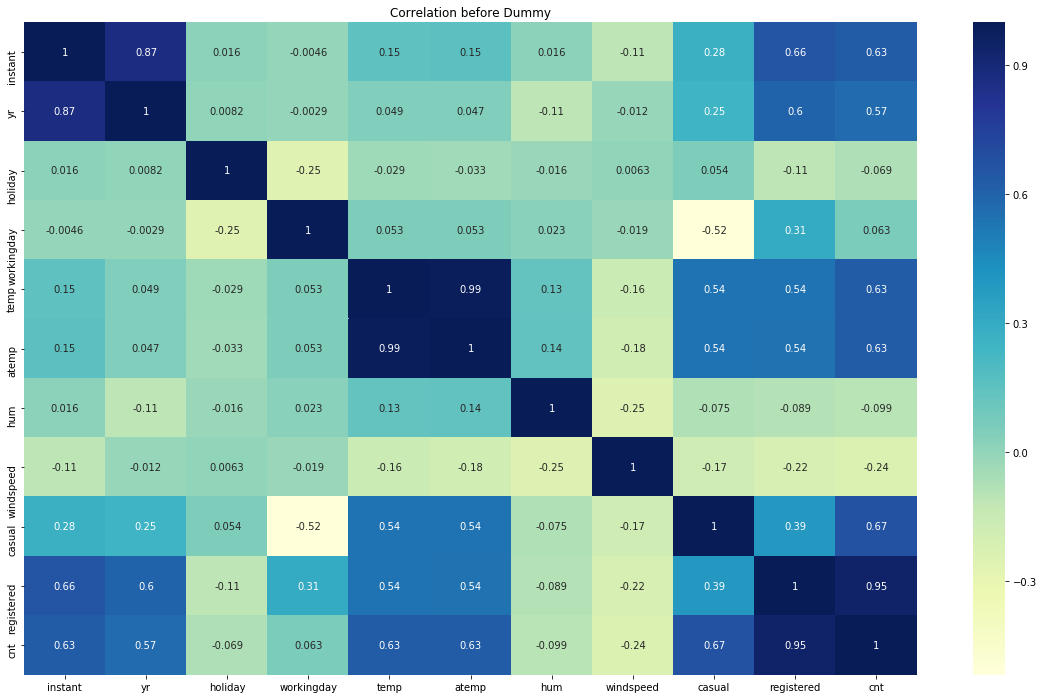

In [236]:
#making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation before Dummy')
plt.show()

In [237]:
#dropping the un-required variables from the dataset 

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [238]:
df.shape

(730, 11)

In [239]:
df.describe ()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [240]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [241]:
#creating dummy variables and add to original dataframe
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [242]:
# dropping variables where we have dummy created
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [243]:
df.shape

(730, 29)

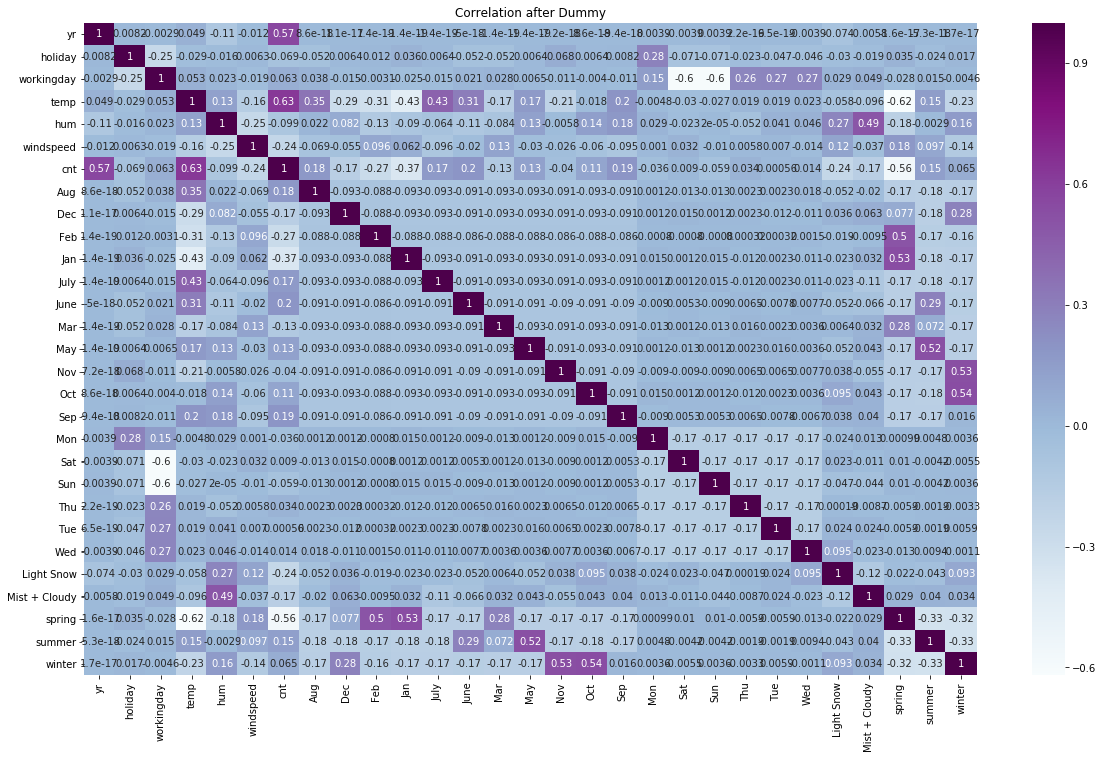

In [244]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.title('Correlation after Dummy')
plt.show()

In [245]:
#splitting the dataset into train and test sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [246]:
df_train.shape

(510, 29)

In [247]:
df_test.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,0,...,0,0,1,0,0,0,0,0,1,0
404,1,0,1,10.865000,56.2083,13.000479,3830,0,0,1,...,0,0,1,0,0,0,0,1,0,0
198,0,0,1,30.613347,65.1250,14.458868,4458,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,1,27.914153,77.0417,11.458675,4835,0,0,0,...,0,0,0,1,0,0,1,0,0,0
512,1,1,0,29.212500,67.6250,13.166907,6043,0,0,0,...,0,0,0,0,0,0,0,0,1,0
200,0,0,1,31.501653,70.7083,7.625739,4332,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [248]:
# scaling of variables
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])
df_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0
580,1,0,0,0.914852,0.632030,0.462538,0.782559,1,0,0,...,1,0,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.719193,0.172431,0.851588,0,0,0,...,0,0,0,0,1,0,0,0,1,0
479,1,0,1,0.520271,0.440962,0.164434,0.710308,0,0,0,...,0,0,0,0,1,0,0,0,1,0
472,1,0,1,0.503656,0.586518,0.270032,0.499885,0,0,0,...,0,0,0,0,1,0,1,0,1,0
455,1,0,0,0.456929,0.696865,0.279394,0.692476,0,0,0,...,0,1,0,0,0,0,1,0,1,0


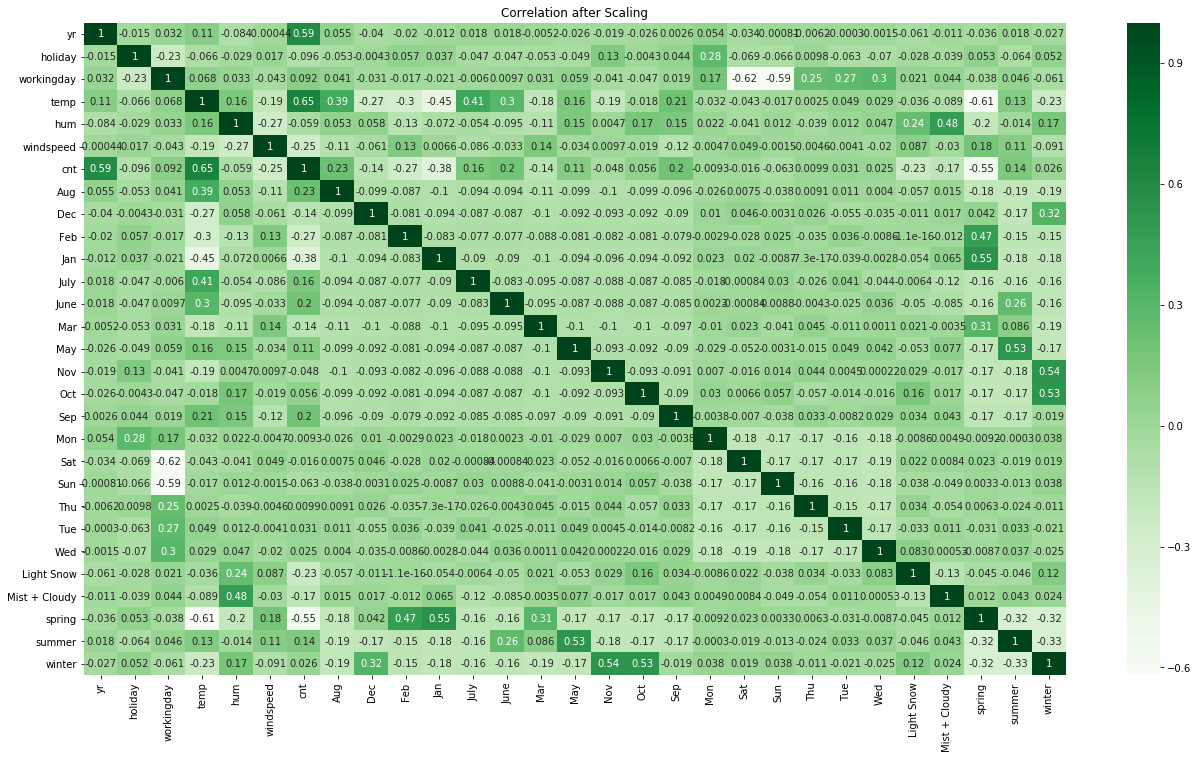

In [249]:
# Correlation after scaling
plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="Greens", annot=True)
plt.title('Correlation after Scaling')
plt.show()

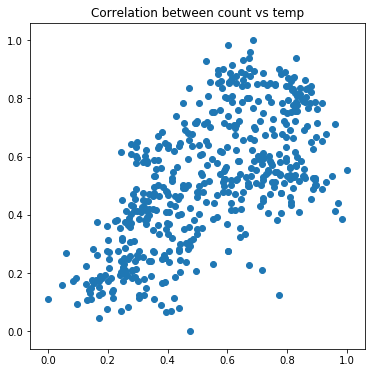

In [250]:
# Cnt vs Temp is 65% correlation
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [251]:
#Training Model using Temp
df_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0
580,1,0,0,0.914852,0.632030,0.462538,0.782559,1,0,0,...,1,0,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.719193,0.172431,0.851588,0,0,0,...,0,0,0,0,1,0,0,0,1,0
479,1,0,1,0.520271,0.440962,0.164434,0.710308,0,0,0,...,0,0,0,0,1,0,0,0,1,0
472,1,0,1,0.503656,0.586518,0.270032,0.499885,0,0,0,...,0,0,0,0,1,0,1,0,1,0
455,1,0,0,0.456929,0.696865,0.279394,0.692476,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [252]:
y_train = df_train.pop('cnt')

In [253]:
X_train = df_train
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [254]:
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [255]:
#Add constant & create first model
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [256]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.46e-61
Time:                        19:27:39   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

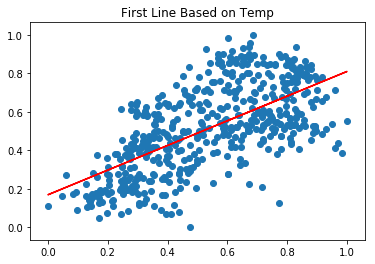

In [257]:
#Best fit Regression Line that was built on Temp
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('First Line Based on Temp')
plt.show()

In [258]:
#Adding Year (59% correlation) to Model
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [259]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          3.34e-130
Time:                        19:27:45   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

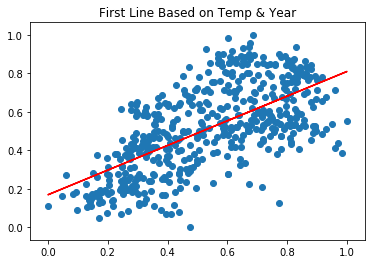

In [260]:
#Best fit Regression Line that was built on Temp & Yr
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('First Line Based on Temp & Year')
plt.show()

In [261]:
#Regression Model with All Variables
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [262]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          3.00e-181
Time:                        19:27:52   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.46e+16
================================================================

In [263]:
#creating the RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 20) 
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('Mar', False, 6),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 3),
 ('Tue', False, 2),
 ('Wed', False, 4),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1)]

In [264]:
true_rfe = X_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Dec', 'Feb',
       'Jan', 'July', 'May', 'Nov', 'Sep', 'Mon', 'Sat', 'Sun', 'Light Snow',
       'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

In [265]:
len(true_rfe)

20

In [266]:
#ReBuild model using selected RFE variables
X_train_rfe = X_train[true_rfe]
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.params

const            0.277538
yr               0.233270
holiday          0.015750
workingday       0.100130
temp             0.417163
hum             -0.148615
windspeed       -0.181647
Dec             -0.055969
Feb             -0.040154
Jan             -0.072242
July            -0.059857
May              0.035428
Nov             -0.053951
Sep              0.061121
Mon             -0.012970
Sat              0.108123
Sun              0.053535
Light Snow      -0.258063
Mist + Cloudy   -0.059378
spring          -0.079733
winter           0.081902
dtype: float64

In [267]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.30e-188
Time:                        19:28:04   Log-Likelihood:                 524.43
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2775      0.026     10.707      0.000       0.227       0.328
yr                0.2333      0.008     29.241      0.000       0.218       0.249
holiday           0.0157      0.022      0.702      0.483      -0.028       0.060
workingday        0.1001      0.009     10.877      0.000       0.082       0.118
temp              0.4172      0.033     12.546      0.000       0.352       0.482
hum              -0.1486      0.038     -3.949      0.000      -0.223      -0.075
windspeed        -0.1816      0.025     -7.186      0.000      -0.231      -0.132
Dec              -0.0560      0.018     -3.156      0.002      -0.091      -0.021
Feb              -0.0402      0.021     -1.893      0.059      -0.082       0.002
Jan              -0.0722      0.021     -3.468      0.001      -0.113      -0.031
July             -0.0599      0.017     -3.480      0.001      -0.094      -0.026
May               0.0354      0.016      2.277      0.023       0.005       0.066
Nov              -0.0540      0.018     -2.922      0.004      -0.090      -0.018
Sep               0.0611      0.016      3.939      0.000       0.031       0.092
Mon              -0.0130      0.012     -1.094      0.275      -0.036       0.010
Sat               0.1081      0.012      9.389      0.000       0.085       0.131
Sun               0.0535      0.012      4.444      0.000       0.030       0.077
Light Snow       -0.2581      0.026     -9.884      0.000      -0.309      -0.207
Mist + Cloudy    -0.0594      0.010     -5.750      0.000      -0.080      -0.039
spring           -0.0797      0.017     -4.609      0.000      -0.114      -0.046
winter            0.0819      0.014      5.704      0.000       0.054       0.110
==============================================================================
Omnibus:                       85.635   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.857
Skew:                          -0.789   Prob(JB):                     1.02e-56
Kurtosis:                       6.106   Cond. No.                     1.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [268]:
#Remove Constants
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [269]:
#VIF Calculation
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,44.37
14,Sat,10.70
15,Sun,10.32
3,temp,3.68
18,spring,3.60
1,holiday,2.90
19,winter,2.51
8,Jan,2.28
4,hum,1.97
7,Feb,1.83


In [270]:
#Drop Working Day and Recalculate Model
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [271]:
X_train_lr1 = sm.add_constant(X_train_new_1)
lr = sm.OLS(y_train, X_train_lr1)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.30e-188
Time:                        19:28:10   Log-Likelihood:                 524.43
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3777      0.032     11.929      0.000       0.315       0.440
yr                0.2333      0.008     29.241      0.000       0.218       0.249
holiday          -0.0844      0.026     -3.203      0.001      -0.136      -0.033
temp              0.4172      0.033     12.546      0.000       0.352       0.482
hum              -0.1486      0.038     -3.949      0.000      -0.223      -0.075
windspeed        -0.1816      0.025     -7.186      0.000      -0.231      -0.132
Dec              -0.0560      0.018     -3.156      0.002      -0.091      -0.021
Feb              -0.0402      0.021     -1.893      0.059      -0.082       0.002
Jan              -0.0722      0.021     -3.468      0.001      -0.113      -0.031
July             -0.0599      0.017     -3.480      0.001      -0.094      -0.026
May               0.0354      0.016      2.277      0.023       0.005       0.066
Nov              -0.0540      0.018     -2.922      0.004      -0.090      -0.018
Sep               0.0611      0.016      3.939      0.000       0.031       0.092
Mon              -0.0130      0.012     -1.094      0.275      -0.036       0.010
Sat               0.0080      0.011      0.706      0.481      -0.014       0.030
Sun              -0.0466      0.012     -3.979      0.000      -0.070      -0.024
Light Snow       -0.2581      0.026     -9.884      0.000      -0.309      -0.207
Mist + Cloudy    -0.0594      0.010     -5.750      0.000      -0.080      -0.039
spring           -0.0797      0.017     -4.609      0.000      -0.114      -0.046
winter            0.0819      0.014      5.704      0.000       0.054       0.110
==============================================================================
Omnibus:                       85.635   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.857
Skew:                          -0.789   Prob(JB):                     1.02e-56
Kurtosis:                       6.106   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [273]:
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,27.04
2,temp,17.42
17,spring,4.29
4,windspeed,4.13
18,winter,3.20
7,Jan,2.37
16,Mist + Cloudy,2.30
0,yr,2.08
6,Feb,1.92
10,Nov,1.86


In [274]:
#Drop Sat and Recalculate Model
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [275]:
X_train_lr2 = sm.add_constant(X_train_new_2)
lr = sm.OLS(y_train, X_train_lr2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.32e-189
Time:                        19:28:14   Log-Likelihood:                 524.17
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3800      0.031     12.076      0.000       0.318       0.442
yr                0.2331      0.008     29.248      0.000       0.217       0.249
holiday          -0.0848      0.026     -3.221      0.001      -0.137      -0.033
temp              0.4165      0.033     12.538      0.000       0.351       0.482
hum              -0.1492      0.038     -3.969      0.000      -0.223      -0.075
windspeed        -0.1810      0.025     -7.168      0.000      -0.231      -0.131
Dec              -0.0558      0.018     -3.151      0.002      -0.091      -0.021
Feb              -0.0407      0.021     -1.921      0.055      -0.082       0.001
Jan              -0.0723      0.021     -3.473      0.001      -0.113      -0.031
July             -0.0596      0.017     -3.469      0.001      -0.093      -0.026
May               0.0349      0.016      2.249      0.025       0.004       0.065
Nov              -0.0544      0.018     -2.951      0.003      -0.091      -0.018
Sep               0.0611      0.016      3.938      0.000       0.031       0.092
Mon              -0.0147      0.012     -1.266      0.206      -0.037       0.008
Sun              -0.0484      0.011     -4.228      0.000      -0.071      -0.026
Light Snow       -0.2579      0.026     -9.884      0.000      -0.309      -0.207
Mist + Cloudy    -0.0593      0.010     -5.745      0.000      -0.080      -0.039
spring           -0.0797      0.017     -4.610      0.000      -0.114      -0.046
winter            0.0822      0.014      5.728      0.000       0.054       0.110
==============================================================================
Omnibus:                       83.029   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.391
Skew:                          -0.758   Prob(JB):                     3.49e-56
Kurtosis:                       6.118   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [277]:
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,26.98
2,temp,17.40
16,spring,4.28
4,windspeed,4.09
17,winter,3.19
7,Jan,2.37
15,Mist + Cloudy,2.30
0,yr,2.08
6,Feb,1.92
10,Nov,1.86


In [278]:
#Drop Hum and Recalculate Model
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)
X_train_lr3 = sm.add_constant(X_train_new_3)
lr = sm.OLS(y_train, X_train_lr3)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          2.29e-187
Time:                        19:28:22   Log-Likelihood:                 516.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     492   BIC:                            -920.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3067      0.026     11.862      0.000       0.256       0.358
yr                0.2366      0.008     29.429      0.000       0.221       0.252
holiday          -0.0846      0.027     -3.168      0.002      -0.137      -0.032
temp              0.3831      0.033     11.747      0.000       0.319       0.447
windspeed        -0.1549      0.025     -6.262      0.000      -0.204      -0.106
Dec              -0.0622      0.018     -3.472      0.001      -0.097      -0.027
Feb              -0.0423      0.022     -1.967      0.050      -0.085   -5.25e-05
Jan              -0.0783      0.021     -3.718      0.000      -0.120      -0.037
July             -0.0538      0.017     -3.094      0.002      -0.088      -0.020
May               0.0248      0.016      1.596      0.111      -0.006       0.055
Nov              -0.0545      0.019     -2.913      0.004      -0.091      -0.018
Sep               0.0559      0.016      3.562      0.000       0.025       0.087
Mon              -0.0172      0.012     -1.460      0.145      -0.040       0.006
Sun              -0.0520      0.012     -4.499      0.000      -0.075      -0.029
Light Snow       -0.2999      0.024    -12.392      0.000      -0.348      -0.252
Mist + Cloudy    -0.0828      0.009     -9.655      0.000      -0.100      -0.066
spring           -0.0841      0.018     -4.801      0.000      -0.118      -0.050
winter            0.0715      0.014      5.002      0.000       0.043       0.100
==============================================================================
Omnibus:                       86.045   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.678
Skew:                          -0.786   Prob(JB):                     3.36e-58
Kurtosis:                       6.160   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [280]:
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.20
3,windspeed,4.08
15,spring,3.83
16,winter,2.70
6,Jan,2.21
0,yr,2.08
5,Feb,1.88
9,Nov,1.83
14,Mist + Cloudy,1.56
4,Dec,1.56


In [281]:
#Drop Windspeed and Remodel
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)
X_train_lr4 = sm.add_constant(X_train_new_4)
lr = sm.OLS(y_train, X_train_lr4)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          2.53e-180
Time:                        19:28:30   Log-Likelihood:                 496.56
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2333      0.024      9.752      0.000       0.186       0.280
yr                0.2353      0.008     28.198      0.000       0.219       0.252
holiday          -0.0878      0.028     -3.168      0.002      -0.142      -0.033
temp              0.4173      0.033     12.504      0.000       0.352       0.483
Dec              -0.0494      0.018     -2.676      0.008      -0.086      -0.013
Feb              -0.0356      0.022     -1.596      0.111      -0.079       0.008
Jan              -0.0571      0.022     -2.646      0.008      -0.100      -0.015
July             -0.0510      0.018     -2.828      0.005      -0.086      -0.016
May               0.0291      0.016      1.805      0.072      -0.003       0.061
Nov              -0.0538      0.019     -2.771      0.006      -0.092      -0.016
Sep               0.0653      0.016      4.032      0.000       0.033       0.097
Mon              -0.0165      0.012     -1.349      0.178      -0.040       0.008
Sun              -0.0518      0.012     -4.317      0.000      -0.075      -0.028
Light Snow       -0.3131      0.025    -12.509      0.000      -0.362      -0.264
Mist + Cloudy    -0.0816      0.009     -9.174      0.000      -0.099      -0.064
spring           -0.0893      0.018     -4.920      0.000      -0.125      -0.054
winter            0.0812      0.015      5.504      0.000       0.052       0.110
==============================================================================
Omnibus:                       89.661   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.462
Skew:                          -0.796   Prob(JB):                     6.94e-65
Kurtosis:                       6.372   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.66
14,spring,3.47
15,winter,2.68
5,Jan,2.21
0,yr,2.07
4,Feb,1.88
8,Nov,1.81
3,Dec,1.55
13,Mist + Cloudy,1.55
6,July,1.41


In [283]:
X_train_new_5 = X_train_lr4.drop(['Feb'], axis = 1)
X_train_lr5 = sm.add_constant(X_train_new_5)
lr = sm.OLS(y_train, X_train_lr5)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          6.86e-181
Time:                        19:28:37   Log-Likelihood:                 495.25
No. Observations:                 510   AIC:                            -958.5
Df Residuals:                     494   BIC:                            -890.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2258      0.023      9.611      0.000       0.180       0.272
yr                0.2350      0.008     28.129      0.000       0.219       0.251
holiday          -0.0903      0.028     -3.255      0.001      -0.145      -0.036
temp              0.4288      0.033     13.140      0.000       0.365       0.493
Dec              -0.0411      0.018     -2.316      0.021      -0.076      -0.006
Jan              -0.0389      0.018     -2.120      0.034      -0.075      -0.003
July             -0.0532      0.018     -2.956      0.003      -0.089      -0.018
May               0.0293      0.016      1.813      0.070      -0.002       0.061
Nov              -0.0497      0.019     -2.577      0.010      -0.088      -0.012
Sep               0.0653      0.016      4.022      0.000       0.033       0.097
Mon              -0.0165      0.012     -1.346      0.179      -0.040       0.008
Sun              -0.0522      0.012     -4.339      0.000      -0.076      -0.029
Light Snow       -0.3123      0.025    -12.461      0.000      -0.362      -0.263
Mist + Cloudy    -0.0817      0.009     -9.164      0.000      -0.099      -0.064
spring           -0.1022      0.016     -6.272      0.000      -0.134      -0.070
winter            0.0804      0.015      5.444      0.000       0.051       0.109
==============================================================================
Omnibus:                       85.260   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.459
Skew:                          -0.754   Prob(JB):                     4.62e-62
Kurtosis:                       6.319   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [285]:
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.63
14,winter,2.64
0,yr,2.07
13,spring,2.00
7,Nov,1.80
4,Jan,1.65
12,Mist + Cloudy,1.55
3,Dec,1.46
5,July,1.41
9,Mon,1.31


In [286]:
X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

,const,yr,holiday,temp,Dec,Jan,July,May,Nov,Sep,Mon,Sun,Light Snow,Mist + Cloudy,spring,winter
576,1.0,1,0,0.815169,0,0,1,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,1,0,0,0,0,0,0,1,0,0,1,0
482,1.0,1,0,0.395666,0,0,0,0,0,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0,0,0,0,0,0,0,0,0,1,0,0
580,1.0,1,0,0.914852,0,0,0,0,0,0,0,0,0,0,0,0
500,1.0,1,0,0.719639,0,0,0,1,0,0,0,0,0,0,0,0
479,1.0,1,0,0.520271,0,0,0,0,0,0,0,0,0,0,0,0
472,1.0,1,0,0.503656,0,0,0,0,0,0,0,0,0,1,0,0
455,1.0,1,0,0.456929,0,0,0,0,0,0,0,1,0,1,0,0


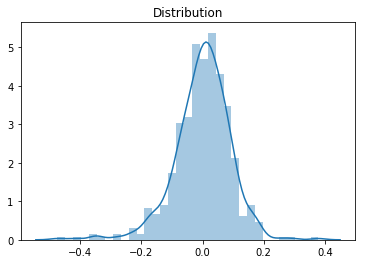

In [287]:
y_train_pred = lr_model.predict(X_train_lr5)
residual = y_train - y_train_pred
sns.distplot(residual)
plt.title('Distribution')
plt.show()

In [288]:
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [289]:
df_test[scaler_var] = scaler.transform(df_test[scaler_var])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [290]:
#Build Test Model
y_test = df_test.pop('cnt')
X_test = df_test
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [291]:
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Dec', 'Jan', 'July', 'May', 'Nov',
       'Sep', 'Mon', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

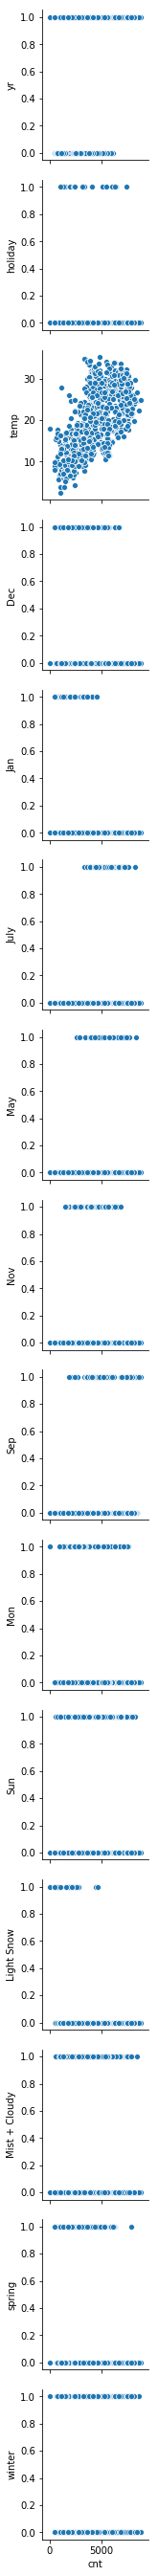

<Figure size 1152x864 with 0 Axes>

In [292]:
#Build Regression Model & Plot for Visulaizing Impact
X_train_lr5.drop(columns= 'const', inplace = True)
X_test_new = X_test[X_train_lr5.columns]
X_test_new = sm.add_constant(X_test_new)
y_pred = lr_model.predict(X_test_new)
sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

In [294]:
#R2 score of Test
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score of Test Set :', r2_test)

r2 score of Test Set : 0.8266212284236569


In [295]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score of Train Set :', r2_train)

r2 score of Train Set : 0.8329747545988513


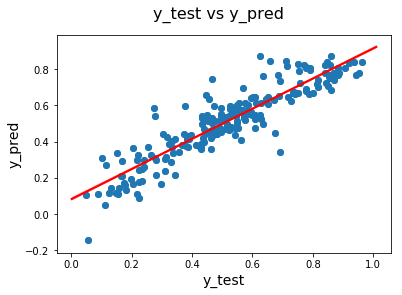

In [296]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [298]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          6.86e-181
Time:                        20:59:17   Log-Likelihood:                 495.25
No. Observations:                 510   AIC:                            -958.5
Df Residuals:                     494   BIC:                            -890.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2258      0.023      9.611      0.000       0.180       0.272
yr                0.2350      0.008     28.129      0.000       0.219       0.251
holiday          -0.0903      0.028     -3.255      0.001      -0.145      -0.036
temp              0.4288      0.033     13.140      0.000       0.365       0.493
Dec              -0.0411      0.018     -2.316      0.021      -0.076      -0.006
Jan              -0.0389      0.018     -2.120      0.034      -0.075      -0.003
July             -0.0532      0.018     -2.956      0.003      -0.089      -0.018
May               0.0293      0.016      1.813      0.070      -0.002       0.061
Nov              -0.0497      0.019     -2.577      0.010      -0.088      -0.012
Sep               0.0653      0.016      4.022      0.000       0.033       0.097
Mon              -0.0165      0.012     -1.346      0.179      -0.040       0.008
Sun              -0.0522      0.012     -4.339      0.000      -0.076      -0.029
Light Snow       -0.3123      0.025    -12.461      0.000      -0.362      -0.263
Mist + Cloudy    -0.0817      0.009     -9.164      0.000      -0.099      -0.064
spring           -0.1022      0.016     -6.272      0.000      -0.134      -0.070
winter            0.0804      0.015      5.444      0.000       0.051       0.109
==============================================================================
Omnibus:                       85.260   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.459
Skew:                          -0.754   Prob(JB):                     4.62e-62
Kurtosis:                       6.319   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)

In [302]:
#Equation of Slope of Best Fit Line
print(f"y = {slope}x + {intercept}")

y = 0.8325099164083026x + 0.08190933683653967


In [303]:
#Root Mean Square Calculation
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008395685323095113
Mean squared error of the test set is 0.008289981044812128
